In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv


In [3]:
import pandas as pd
import numpy as np
from numpy import array
import time
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as s
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm

In [4]:
df = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
df2 = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv'

In [ ]:
df.isnull()

In [ ]:
df = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')
df.drop(columns='attack_cat', inplace = True )
Attack= df[df['label'] == 1]
NonAttack = df[df['label'] == 0]
classes = pd.value_counts(df['label'], sort = True)
output=df['label']
df=df.iloc[:,:-1]

labels = ['NonAttacks','Attack']
classes.plot(kind = 'pie', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
output.value_counts()

NameError: name 'output' is not defined

In [6]:
df.info()

NameError: name 'df' is not defined

In [8]:
#One Hot Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from numpy import array

le_service = LabelEncoder()
le_proto = LabelEncoder()
le_state= LabelEncoder()
df['service_encoded'] = le_service.fit_transform(df.service)
df['proto_encoded'] = le_proto.fit_transform(df.proto)
df['state_encoded'] = le_state.fit_transform(df.state)


service_ = OneHotEncoder()
proto_ = OneHotEncoder()
state_ = OneHotEncoder()
X = service_.fit_transform(df.service_encoded.values.reshape(-1,1)).toarray()
Xm = proto_.fit_transform(df.proto_encoded.values.reshape(-1,1)).toarray()
Xmm = state_.fit_transform(df.state_encoded.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["service_"+str(int(i)) for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(Xm, columns = ["proto_"+str(int(i)) for i in range(Xm.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)
dfOneHot = pd.DataFrame(Xmm, columns = ["state_"+str(int(i)) for i in range(Xmm.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)

df.drop(columns=['proto','service','state'], inplace = True )
df.shape
df2.drop(columns='attack_cat', inplace = True )

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [9]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,proto_128,proto_129,proto_130,state_0,state_1,state_2,state_3,state_4,state_5,state_6
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,0.000413,0.000389,0.000389,0.000049,0.000012,0.084803,0.477809,0.414942,0.022373,0.000012
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,0.020317,0.019711,0.019711,0.006970,0.003485,0.278590,0.499510,0.492715,0.147894,0.003485
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatuers=SelectKBest(score_func=chi2,k=100)
inp=df.iloc[:,0:198]
fit=bestfeatuers.fit(inp,output)
dfscores=pd.DataFrame(fit.scores_)
dfcol=pd.DataFrame(inp.columns)
featurescore=pd.concat([dfcol,dfscores],axis=1)
featurescore.columns=['feature','score']
k=featurescore['feature']
t=featurescore.nlargest(100,'score')
li=list(t['feature'])
print("Top 100 features:")
print("\n")
for x in li:
    print(x,end=" , ")

Top 100 features:


dtcpb , stcpb , sload , dload , rate , id , dbytes , sbytes , sinpkt , sjit , response_body_len , dmean , swin , dinpkt , djit , dwin , sttl , dpkts , ct_src_dport_ltm , ct_dst_sport_ltm , dttl , ct_dst_src_ltm , smean , ct_srv_dst , ct_srv_src , dloss , ct_src_ltm , ct_dst_ltm , spkts , state_4 , service_2 , state_2 , ct_state_ttl , proto_111 , service_encoded , state_3 , proto_117 , service_0 , sloss , proto_118 , state_encoded , state_5 , ct_flw_http_mthd , proto_6 , is_sm_ips_ports , tcprtt , proto_77 , service_7 , synack , service_4 , proto_95 , service_11 , trans_depth , ackdat , service_9 , proto_3 , proto_32 , proto_89 , proto_51 , proto_98 , proto_108 , proto_70 , proto_79 , proto_109 , service_5 , proto_41 , proto_8 , proto_64 , proto_83 , proto_128 , proto_4 , proto_11 , proto_13 , proto_19 , proto_23 , proto_25 , proto_30 , proto_33 , proto_42 , proto_44 , proto_49 , proto_57 , proto_60 , proto_65 , proto_72 , proto_74 , proto_76 , proto_85 , proto_88 , 

In [11]:
x_train=df[li]
y_train=output
x_test=df2[li]
y_test = df2['label']
val=[]

KeyError: "['proto_19', 'proto_33', 'proto_88', 'proto_23', 'proto_44', 'proto_2', 'proto_111', 'service_5', 'proto_95', 'proto_64', 'proto_7', 'proto_89', 'service_11', 'proto_60', 'proto_13', 'proto_76', 'state_3', 'proto_108', 'proto_79', 'proto_6', 'proto_65', 'state_encoded', 'proto_109', 'proto_5', 'proto_72', 'proto_117', 'proto_10', 'state_4', 'proto_1', 'proto_51', 'proto_25', 'proto_85', 'proto_30', 'proto_114', 'proto_3', 'proto_115', 'proto_70', 'proto_118', 'proto_4', 'service_9', 'proto_128', 'state_5', 'proto_77', 'proto_41', 'state_2', 'proto_9', 'proto_49', 'proto_98', 'service_2', 'proto_0', 'service_0', 'service_7', 'service_encoded', 'proto_83', 'service_4', 'proto_11', 'proto_32', 'proto_74', 'proto_8', 'proto_57', 'proto_106', 'proto_127', 'proto_42'] not in index"

In [12]:
#Decision tree
start = time.time()
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))
val=[]
dec_tree_f=accuracy_score(y_test, preds)
val.append(dec_tree_f)
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)

NameError: name 'x_test' is not defined

In [13]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
start = time.time()

clf = RandomForestClassifier(n_estimators = 2,random_state=30)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))
random_for_f=accuracy_score(y_test, preds)
val.append(random_for_f)
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)


NameError: name 'x_test' is not defined

In [14]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
n = GaussianNB()

n.fit(x_train, y_train)
preds = n.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

print ("Train Accuracy :: ", accuracy_score(y_train, n.predict(x_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, preds))
gnb=accuracy_score(y_test, preds)
val.append(gnb)
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
end = time.time()
print(end - start)


NameError: name 'x_test' is not defined

In [7]:
#Model Accuracy Graph
alg=["Decision Tree","Random Forest","Gaussian NB ", "svm"] 
for i in range(len(alg)):
    print("The accuracy acheived using ",alg[i]," is: ",(val[i])*100,"%")

NameError: name 'val' is not defined

NameError: name 'val' is not defined

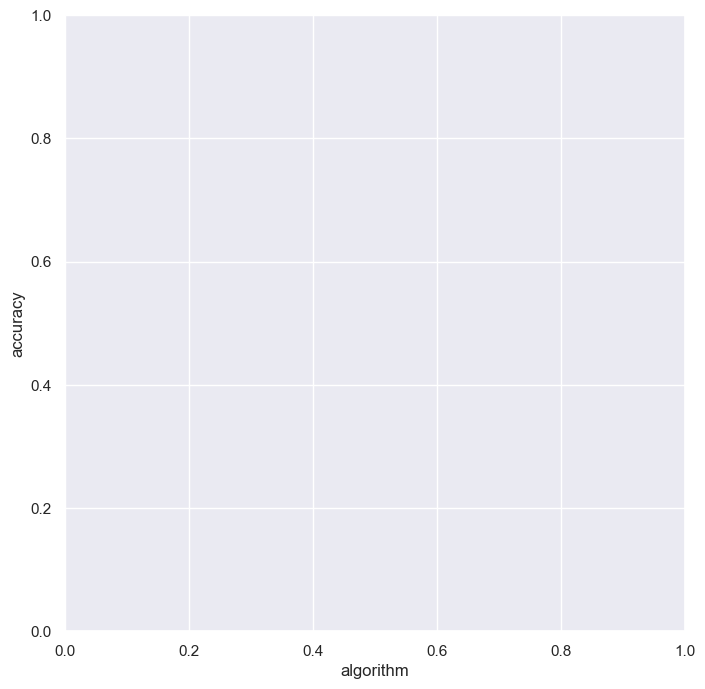

In [8]:
s.set(rc={'figure.figsize':(8,8)})
plt.xlabel("algorithm")
plt.ylabel("accuracy")
s.barplot(alg,val)

# **Project of other Candidate **

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if 'csv' in filename:
            print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Introduction
* [The UNSW-NB15 dataset description](https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/)
* [Feature visualization and preprocessing](https://www.kaggle.com/khairulislam/unsw-nb15-eda)
* [Feature importance using RandomForest classifier](https://www.kaggle.com/khairulislam/unsw-nb15-feature-importance)
* [Performance with other classifiers](https://www.kaggle.com/khairulislam/unsw-nb15-anomaly-detection)

# Utils

In [10]:
def input_train_test():
    root = '../input/unsw-nb15/'
    train = pd.read_csv(root+'UNSW_NB15_training-set.csv')
    test = pd.read_csv(root+'UNSW_NB15_testing-set.csv')
    
    if train.shape[0] == 82332:
        print("Train and test sets are reversed here. Fixing them.")
        train, test = test, train
    drop_columns = ['attack_cat', 'id']
    for df in [train, test]:
        for col in drop_columns:
            if col in df.columns:
                print('Dropping '+col)
                df.drop([col], axis=1, inplace=True)
    return train, test

def get_cat_columns(train):
    categorical = []
    for col in train.columns:
        if train[col].dtype == 'object':
            categorical.append(col)
    return categorical
    
def label_encode(train, test):
    for col in get_cat_columns(train):
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))
    return train, test

def feature_process(df):
    df.loc[~df['state'].isin(['FIN', 'INT', 'CON', 'REQ', 'RST']), 'state'] = 'others'
    df.loc[~df['service'].isin(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']), 'service'] = 'others'
    df.loc[df['proto'].isin(['igmp', 'icmp', 'rtp']), 'proto'] = 'igmp_icmp_rtp'
    df.loc[~df['proto'].isin(['tcp', 'udp', 'arp', 'ospf', 'igmp_icmp_rtp']), 'proto'] = 'others'
    return df

def get_train_test(train, test, feature_engineer=True, label_encoding=False, scaler=None):
    x_train, y_train = train.drop(['label'], axis=1), train['label']
    x_test, y_test = test.drop(['label'], axis=1), test['label']
    
    x_train, x_test = feature_process(x_train), feature_process(x_test)
    if scaler is not None:
        categorical_columns = get_cat_columns(x_train)
        non_categorical_columns = [x for x in x_train.columns if x not in categorical_columns]
        x_train[non_categorical_columns] = scaler.fit_transform(x_train[non_categorical_columns])
        x_test[non_categorical_columns] = scaler.transform(x_test[non_categorical_columns])
    
    if label_encoding:
        x_train, x_test = label_encode(x_train, x_test)
        features = x_train.columns
    else:
        x_train = pd.get_dummies(x_train)
        x_test = pd.get_dummies(x_test)
        print("Column mismatch {0}, {1}".format(set(x_train.columns)- set(x_test.columns),  set(x_test.columns)- set(x_train.columns)))
        features = list(set(x_train.columns) & set(x_test.columns))
    print(f"Number of features {len(features)}")
    x_train = x_train[features]
    x_test = x_test[features]

    return x_train, y_train, x_test, y_test

def run_lgb(x, y, tr_idx, val_idx, param, num_round=100):
    lgb_train = lgb.Dataset(x.iloc[tr_idx], y.iloc[tr_idx])
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    validation = lgb.Dataset(x_val, y_val)
    clf = lgb.train(param, lgb_train, num_round, valid_sets=[validation], early_stopping_rounds=50, verbose_eval=200, feval=lgb_f1_score)
    return clf

def false_alarm_rate(y_true, y_pred):
    CM = metrics.confusion_matrix(y_true, y_pred)
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    return (FP+FN)/(TP+TN+FP+FN)

def results(y_test, y_prob):
    threshold = 0.5
    y_pred = np.where(y_prob >= threshold, 1, 0)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    pre = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred) # it is also called detection rate or true positive rate
    f1 = metrics.f1_score(y_test, y_pred)
    print(f"Acc {acc}, Precision {pre}, Recall {rec}, F1-score {f1}")
    
    CM = metrics.confusion_matrix(y_test, y_pred)
    TN, FN, TP, FP = CM[0][0], CM[1][0], CM[1][1], CM[0][1]
    # false positive rate
    FPR = FP/(FP+TN)
    # false alarm rate 
    FAR = (FP+FN)/(TP+TN+FP+FN)
    AUC = metrics.roc_auc_score(y_test, y_prob)
    
    print("FPR {0}, FAR {1}, AUC {2}".format(FPR, FAR, AUC))
    # print(metrics.classification_report(y_test, y_pred))
    
def test_run(x_train, y_train, x_test, y_test, param, num_round=2000):
    start = time.clock()
    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_validation = lgb.Dataset(x_test, y_test)
    clf = lgb.train(param, lgb_train, num_round, valid_sets=[lgb_validation], early_stopping_rounds=50, verbose_eval=200, feval=lgb_f1_score)
    # clf = lgb.train(param, lgb_train, 2000, valid_sets=[lgb_validation], early_stopping_rounds=50, verbose_eval=200)
    y_prob = clf.predict(x_test, num_iteration=clf.best_iteration)
    
    print()
    results(y_test, y_prob)
    print("Time spent {0}".format(time.clock() - start))
    return y_prob
    
def cross_validation(X, Y, param, kf, num_round=2000):
    start = time.clock()
    y_probs = []
    y_vals = []

    # for tr_idx, val_idx in tqdm(kf.split(X, Y), total=folds):
    for tr_idx, val_idx in kf.split(X, Y):
        clf = run_lgb(X, Y, tr_idx, val_idx, param, num_round)
        x_val, y_val = X.iloc[val_idx], Y.iloc[val_idx]
        y_prob = clf.predict(x_val, num_iteration=clf.best_iteration)
        
        y_probs.extend(y_prob)
        y_vals.extend(y_val)

    print()
    results(y_vals, np.asarray(y_probs))
    print("Time spent {0}".format(time.clock() - start))

In [11]:
train, test = input_train_test()

FileNotFoundError: [Errno 2] No such file or directory: '../input/unsw-nb15/UNSW_NB15_training-set.csv'

# Train data

In [12]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from tqdm import tqdm_notebook as tqdm

def lgb_accuracy(preds, data):
    y_true = data.get_label()
    y_pred = np.round(preds)
    return 'acc', metrics.accuracy_score(y_true, y_pred), True

def lgb_f1_score(preds, data):
    y_true = data.get_label()
    y_pred = np.round(preds) # scikits f1 doesn't like probabilities
    return 'f1', metrics.f1_score(y_true, y_pred), True

ModuleNotFoundError: No module named 'lightgbm'

In [13]:
folds = 10
seed = 1
num_round = 2000
kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)

start = time.clock() 
drop_columns = ['is_sm_ips_ports', 'dwin', 'is_ftp_login', 'trans_depth', 'dttl', 'ct_ftp_cmd']
for df in [train, test]:
    df.drop(drop_columns, axis=1, inplace=True)
x_train, y_train, x_test, y_test = get_train_test(train, test, feature_engineer=True, label_encoding=False, scaler=StandardScaler())
print("Time spent in total preprocessing {0} s".format(time.clock() - start))

AttributeError: module 'time' has no attribute 'clock'

In [14]:
param = {
    'objective': 'binary', 
    'learning_rate': 0.1, 
    "boost_from_average":True,
    "metric": 'binary_logloss' # 'auc'
}
start = time.clock()
# test_run( x_train, y_train, x_train, y_train, param)
clf = lgb.train(param, lgb.Dataset(x_train, y_train), 2000, valid_sets=[lgb.Dataset(x_train, y_train)], early_stopping_rounds=50, verbose_eval=200)
y_prob = clf.predict(x_train, num_iteration=clf.best_iteration)
print()
results(y_train, y_prob)
print("Time spent {0}".format(time.clock() - start))

AttributeError: module 'time' has no attribute 'clock'

In [15]:
y_prob = clf.predict(x_test, num_iteration=clf.best_iteration)
print()
results(y_test, y_prob)

NameError: name 'clf' is not defined

## Ten-fold cross validation

After dropping irrelevant columns, feature engineering and applying oneHotEncoding. We found among different scaling StandardScaler is performing the best.

|Preprocess| Param | Accuracy |F1-score |
|:---:|:---:|:---:|:---:|:---:|:---:|
|RobustScaler|learning rate 0.05|96.11| 97.16|
||learning rate 0.1|95.19| 97.22|
||learning rate 0.3|95.73| 96.88|
|StandardScaler |learning rate 0.05|96.08| 97.14 |
||learning rate 0.1| 96.20 | 97.23|
||learning rate 0.3| 95.71 | 96.87|
|MinMaxScaler |learning rate 0.05|96.08| 97.14
| |learning rate 0.1|96.20|97.22 

In [16]:
param = {
    'objective': 'binary', 
    'learning_rate': 0.1, 
    "boost_from_average":True,
    "metric": 'binary_logloss' # 'auc'
}
cross_validation(x_train, y_train, param, kf)

NameError: name 'x_train' is not defined

## Five-fold cross validation

In [17]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cross_validation(x_train, y_train, param, kf)

NameError: name 'x_train' is not defined

# Test data

In [18]:
param = {
    'objective': 'binary', 
    'learning_rate': 0.1, 
    "boost_from_average":True,
    "metric": 'binary_logloss' # 'auc'
}
y_prob = test_run(x_test, y_test, x_test, y_test, param)

NameError: name 'x_test' is not defined

## Validate on test data
Here the model trained on test data is being validated using test data.

|Param|Accuracy|F1-score|
|:---:|:---:|:---:|:---:|
|learning_rate 0.1 | 87.74 | 89.87
|learning_rate 0.05 | 87.60 | 89.77
|learning_rate 0.1, is_unbalance True | 91.87 | 92.9
|learning_rate 0.05, is_unbalance True | 91.95 | 92.96

In [19]:
param = {
    'objective': 'binary',
    'learning_rate': 0.05, 
    'boost_from_average':True,
    'is_unbalance':True,
    "metric": 'binary_logloss' # 'auc'
}
y_prob = test_run(x_train, y_train, x_test, y_test, param)

NameError: name 'x_train' is not defined

In [20]:
y_pred = np.where(y_prob >= 0.5, 1, 0)
print(metrics.confusion_matrix(y_test, y_pred))

target_names = ['Normal', 'Anomaly']
cm = metrics.confusion_matrix(y_test, y_pred)
# Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.rc('font', size=20) 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)

plt.ylabel('Actual')
plt.xlabel('Predicted')
 
plt.show(block=False)

NameError: name 'y_prob' is not defined

## Ten-fold cross validation

|Param|Accuracy| F1-score|
|:---:|:---:|:---:|
|learning_rate 0.05| 98.07 | 98.24
|learning_rate 0.1| 98.18 | 98.34
|learning_rate 0.3| 98.08 | 98.25
|learning_rate 0.1, feature_fraction 0.5 | 98.14 | 98.30
|learning_rate 0.05, feature_fraction 0.5| 98.04 | 98.21


In [21]:
param = {
    'objective': 'binary',
    'learning_rate': 0.1, 
    "boost_from_average":True,
    # 'is_unbalance':True,
    # "feature_fraction":0.5,
    "metric": 'binary_logloss' # 'auc'
}
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cross_validation(x_test, y_test, param, kf, num_round=2000)

NameError: name 'x_test' is not defined

## Five-fold cross validation

In [22]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cross_validation(x_test, y_test, param, kf)

NameError: name 'x_test' is not defined

# Combined data
Here we combined both train and test set. Then evaluated their ten-fold cross validation performance.

In [23]:
total = pd.concat([train, test], axis=0)
X, Y = total.drop(['label'], axis=1), total['label']
categorical_columns = get_cat_columns(X)
non_categorical_columns = [col for col in X.columns if col not in categorical_columns]
X = feature_process(X)
X[non_categorical_columns] = StandardScaler().fit_transform(X[non_categorical_columns])
X = pd.get_dummies(X)

NameError: name 'train' is not defined

| Param | Accuracy | F1-score
|:---:|:---:|:---:|
|learning rate 0.05 | 95.11 | 96.15
|learning rate 0.01 | 93.69 | 95.07
|learning rate 0.1 | 95.09 | 96.07
|learning rate 0.1, is_unbalance True | 95.16 | 96.19
|learning rate 0.1, bagging_fraction 0.8 | 95.14 | 96.17
|learning rate 0.1, feature_fraction 0.5 | 95.20 | 96.22
|learning rate 0.1, feature_fraction 0.5, bagging_fraction 0.8 | 95.05 | 96.11

In [24]:
param = {
    'objective': 'binary',
    'learning_rate': 0.1, 
    "boost_from_average":True,
    # 'is_unbalance':True,
    # "bagging_fraction":0.8,
    "feature_fraction":0.5,
    # "bagging_freq":1,
    "metric": 'binary_logloss' # 'auc'
}
cross_validation(X, Y, param, kf, num_round=2000)

NameError: name 'X' is not defined